# Feature Extraction
​
In order to feed text to a model we need to transform it to a numerical features, in this notebook we will discuss how to build a bag-of-words model from text to use it later for different applications.


In [35]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Bag of words

Count the occurrences of words in the corpus.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ['the red dog', 'cat eats dog', 'dog eats food', 'red cat eats', 'the hot dog']

vectorizer = CountVectorizer()
vectorizer.fit(texts)

X = vectorizer.transform(texts)
#print(X)
columns = vectorizer.get_feature_names()
print(columns)

pd.DataFrame(X.todense(), columns = columns, index = texts)

['cat', 'dog', 'eats', 'food', 'hot', 'red', 'the']


,cat,dog,eats,food,hot,red,the
the red dog,0,1,0,0,0,1,1
cat eats dog,1,1,1,0,0,0,0
dog eats food,0,1,1,1,0,0,0
red cat eats,1,0,1,0,0,1,0
the hot dog,0,1,0,0,1,0,1


In [17]:
vectorizer.transform(['blue dog']).todense()

matrix([[0, 1, 0, 0, 0, 0, 0]], dtype=int64)

# Stop-words

Stop-words are words that are not significant to the topic in hand, for example `[am, is, are, in, at, ...]` can be considered stop-words in many applications as they don't add meaning.

In some other domains and problems you may have different kind of stop-words, for example if you are processing some chatbot data you may find `[can you please, would you please, can I, may I, ...]` such examples don't add meaning so stop-words can also be domain specific, and `TFIDF` can help you find these.

In [21]:
texts = [ 'the red dog', 'cat eats dog', 'dog eats food',
         'red cat eats', 'the hot dog']

vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (1,2))
vectorizer.fit(texts)
X = vectorizer.transform(texts)

columns = vectorizer.get_feature_names()
pd.DataFrame(X.todense(), columns = columns, index = texts)

,cat,cat eats,dog,dog eats,eats,eats dog,eats food,food,hot,hot dog,red,red cat,red dog
the red dog,0,0,1,0,0,0,0,0,0,0,1,0,1
cat eats dog,1,1,1,0,1,1,0,0,0,0,0,0,0
dog eats food,0,0,1,1,1,0,1,1,0,0,0,0,0
red cat eats,1,1,0,0,1,0,0,0,0,0,1,1,0
the hot dog,0,0,1,0,0,0,0,0,1,1,0,0,0


In [22]:
print(vectorizer.get_feature_names())

['cat', 'cat eats', 'dog', 'dog eats', 'eats', 'eats dog', 'eats food', 'food', 'hot', 'hot dog', 'red', 'red cat', 'red dog']


> Note that the word `the` was removed here

# N-Grams

N-Grams is a way we can use to count for the context in the text, the bigger n-gram range the bigger context you can capture but also more features to generate, so be careful not to break your memory.

In [24]:
texts = [ 'the red dog', 'cat eats dog', 'dog eats food',
         'red cat eats', 'the hot dog']

texts = ['this is happy scenario for nlp' , 'happy scenario for nlp']
vectorizer = CountVectorizer(ngram_range= (1, 3))  # 1 2 3
vectorizer.fit(texts)
X = vectorizer.transform(texts)

columns = vectorizer.get_feature_names()
pd.DataFrame(X.todense(), columns = columns, index = texts)

,for,for nlp,happy,happy scenario,happy scenario for,is,is happy,is happy scenario,nlp,scenario,scenario for,scenario for nlp,this,this is,this is happy
this is happy scenario for nlp,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
happy scenario for nlp,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0


# TFIDF

Instead of just counting the frequency of each word, each word here is weighted using TF-IDF

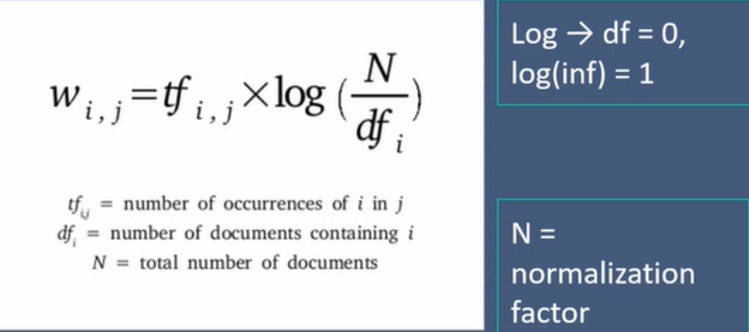

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [ 'the red dog', 'cat eats dog', 'dog eats food','red cat eats', 'the hot dog']

vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))
vectorizer.fit(texts)
X = vectorizer.transform(texts)

columns = vectorizer.get_feature_names()
pd.DataFrame(X.todense(), columns = columns, index = texts)

,cat,cat eats,dog,dog eats,eats,eats dog,eats food,food,hot,hot dog,red,red cat,red dog
the red dog,0.000000,0.000000,0.401565,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.0000,0.575063,0.000000,0.712775
cat eats dog,0.460631,0.460631,0.321658,0.000000,0.382365,0.57094,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000
dog eats food,0.000000,0.000000,0.290314,0.515306,0.345106,0.00000,0.515306,0.515306,0.0000,0.0000,0.000000,0.000000,0.000000
red cat eats,0.437464,0.437464,0.000000,0.000000,0.363135,0.00000,0.000000,0.000000,0.0000,0.0000,0.437464,0.542226,0.000000
the hot dog,0.000000,0.000000,0.370086,0.000000,0.000000,0.00000,0.000000,0.000000,0.6569,0.6569,0.000000,0.000000,0.000000


### Let's use only Bag-of-Words to solve real problems
We can already build some application using only these, let's try a very quick one

### Import libraries

In [26]:
from collections import Counter
import random
from termcolor import colored
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.model_selection import train_test_split

### Load Data

In [28]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset = 'test', remove=['headers', 'footers', 'quotes'],
                         categories=['rec.autos', 'comp.windows.x', 
                                     'soc.religion.christian', 'rec.sport.baseball'])

X = data.data
y = [data.target_names[i] for i in data.target]
print(f'DATA : {X[0]}')
print(f'LABEL: {y[0]}')

DATA : With all the recent problems the Indians have been having
with their pitching staff I have heard numerous names
thrown around about who could solve their problem.

One name I have not heard is Mike Soper (RP).  As far as
I know, Soper has had pretty good minor league stats.
Why not give the kid a chance?  Anyone know anything about
this guy?

-- 
LABEL: rec.sport.baseball


In [29]:
Counter(y)

Counter({'rec.sport.baseball': 397,
         'soc.religion.christian': 398,
         'comp.windows.x': 395,
         'rec.autos': 396})

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

Let's try to get the top-5 similar articles

In [33]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(x_train)
x_train_v = vectorizer.transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [36]:
for i in random.choices(range(0, len(x_test)), k=5):
    print(f"ID: {i}")
    print("True label:", colored(y_test[i], 'green'))
    distances = cosine_similarity(x_test_v[i], x_train_v).flatten()
    indices = np.argsort(distances)[::-1]
    for _, j in enumerate(indices[:3]):
        print(f"{_} nearest label is {colored(y_train[j], 'green' if y_train[j]==y_test[i] else 'red')}",
             f"similarity: {colored(round(distances[j], 3), 'yellow')}")

ID: 160
True label: rec.autos
0 nearest label is rec.autos similarity: 0.205
1 nearest label is rec.autos similarity: 0.182
2 nearest label is rec.autos similarity: 0.177
ID: 159
True label: rec.autos
0 nearest label is soc.religion.christian similarity: 0.227
1 nearest label is rec.sport.baseball similarity: 0.211
2 nearest label is rec.autos similarity: 0.204
ID: 189
True label: rec.sport.baseball
0 nearest label is rec.autos similarity: 0.301
1 nearest label is rec.sport.baseball similarity: 0.223
2 nearest label is rec.sport.baseball similarity: 0.213
ID: 128
True label: soc.religion.christian
0 nearest label is soc.religion.christian similarity: 0.31
1 nearest label is soc.religion.christian similarity: 0.27
2 nearest label is soc.religion.christian similarity: 0.227
ID: 6
True label: rec.autos
0 nearest label is rec.autos similarity: 0.474
1 nearest label is rec.autos similarity: 0.152
2 nearest label is rec.autos similarity: 0.152
